In [1]:
import psycopg2

In [2]:
connection = psycopg2.connect("user=postgres", password="29qwertyus",
                              host="127.0.0.1", port="5432", database="JAP-Ecomerce")
cur = connection.cursor()

In [3]:
cur.execute("SELECT version();")
record = cur.fetchone()
print("You are connected to - ", record)

You are connected to -  ('PostgreSQL 15.2, compiled by Visual C++ build 1914, 64-bit',)


In [4]:
cur.execute("""SELECT table_name FROM information_schema.tables WHERE table_schema = 'public'""")
for table in cur.fetchall():
    print(table)

('customers_dataset',)
('geolocation_dataset',)
('order_payments_dataset',)
('order_review_dataset',)
('order_items_dataset',)
('order_dataset',)
('revenue',)
('canceled_order',)
('top_product',)
('most_canceled_product',)
('product_dataset',)
('seller_dataset',)


In [5]:
cur = connection.cursor()
cur.execute("SELECT payment_type, SUM(CASE WHEN year = 2016 THEN total ELSE 0 END) AS \"2016\", SUM(CASE WHEN year = 2017 THEN total ELSE 0 END) AS \"2017\", SUM(CASE WHEN year = 2018 THEN total ELSE 0 END) AS \"2018\", SUM(total) AS sum_payment_type_usage FROM (SELECT date_part('year', order_purchase_timestamp) AS year, payment_type, COUNT(payment_type) AS total FROM order_dataset AS od JOIN order_payments_dataset AS opd ON od.order_id = opd.order_id GROUP BY 1,2) AS tmp GROUP BY 1 ORDER BY 4 DESC")

hasil = cur.fetchall()

# Mendapatkan daftar nama kolom dari objek kursor
kolom = [desc[0] for desc in cur.description]

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
df = pd.DataFrame(hasil, columns=kolom)
df.head()

,payment_type,2016,2017,2018,sum_payment_type_usage
0,credit_card,258,34568,41969,76795
1,boleto,63,9508,10213,19784
2,voucher,23,3027,2725,5775
3,debit_card,2,422,1105,1529
4,not_defined,0,0,3,3


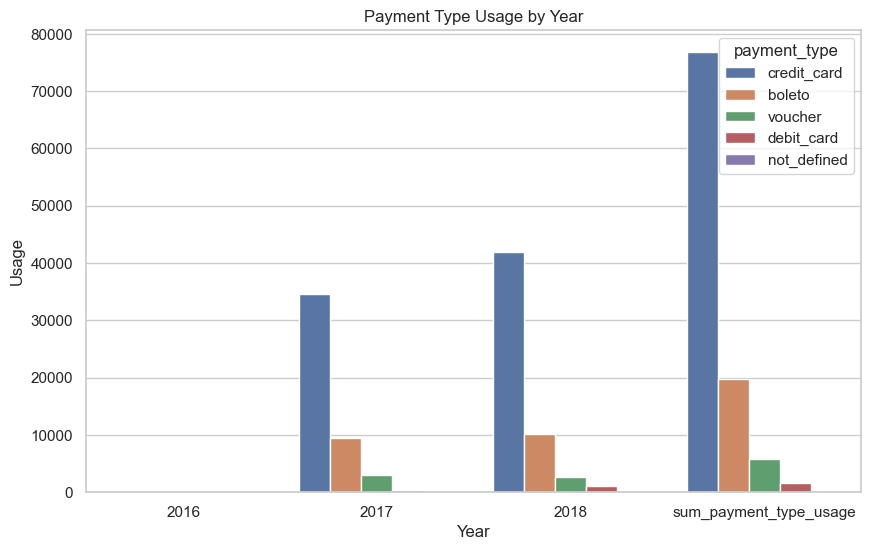

In [16]:
# Melt dataframe untuk mempermudah plotting
df_all = df.melt('payment_type', var_name='year', value_name='usage')

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='usage', hue='payment_type', data=df_all)
plt.xlabel('Year')
plt.ylabel('Usage')
plt.title('Payment Type Usage by Year')
plt.show()